# Logistic Regression

## Distribution of the sigmoid

C:\Users\Martin Biber\AppData\Local\Temp\ipykernel_8476\1217233205.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


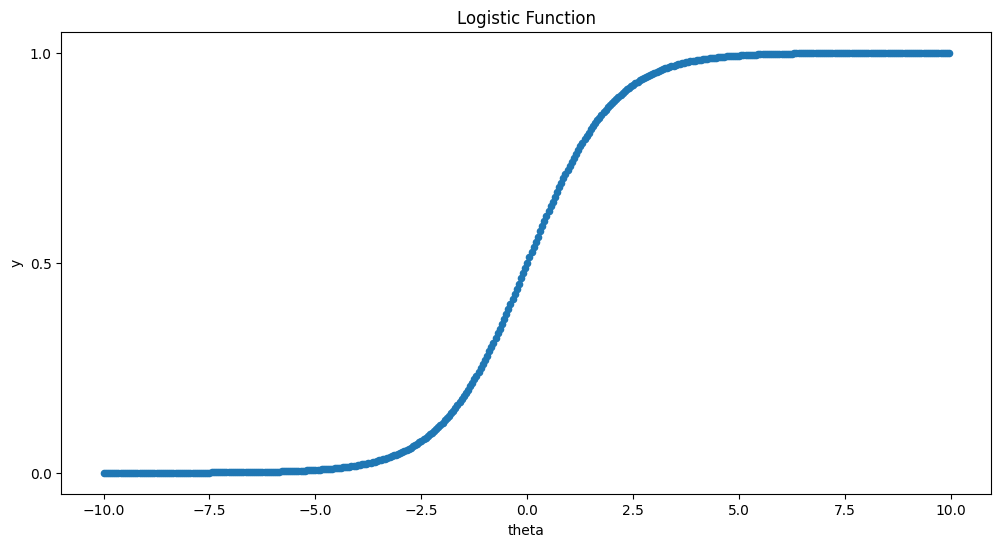

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline  
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

theta = np.arange(-10, 10, 0.05)
y = 1 / (1 + np.exp(-1 * theta))

df_log = pd.DataFrame({'theta': theta,'y': y})
df_log.plot(
    title='Logistic Function', 
    kind='scatter', x='theta', y='y', 
    ax=ax
)

ax.set_yticks(np.arange(0, 1.25, step=0.5))

fig.show()

## Iris Data Set

In [8]:
from sklearn import datasets
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = pd.Series(iris.target)
df.sample(50).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
65,6.7,3.1,4.4,1.4,1
87,6.3,2.3,4.4,1.3,1
66,5.6,3.0,4.5,1.5,1
63,6.1,2.9,4.7,1.4,1
97,6.2,2.9,4.3,1.3,1


In [9]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.3, random_state=22)

In [10]:
x_train = df_train[iris.feature_names]
x_test  = df_test[iris.feature_names]

y_train = df_train['target']
y_test  = df_test['target']

### Logistic Regression on Iris Dataset (multinomial)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate


num_folds = 6

clf = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)

accuracy_scores = cross_validate(clf, df[iris.feature_names], df['target'], cv=num_folds, scoring=['accuracy'])
accuracy_scores

{'fit_time': array([0.03401685, 0.01999831, 0.01597881, 0.02199864, 0.01798201,
        0.02101731]),
 'score_time': array([0.0010004 , 0.0010016 , 0.00202036, 0.00199986, 0.00200248,
        0.00099993]),
 'test_accuracy': array([0.96, 1.  , 0.96, 0.92, 0.96, 1.  ])}

In [16]:
accuracy_mean = pd.Series(accuracy_scores['test_accuracy']).mean()
accuracy_std = pd.Series(accuracy_scores['test_accuracy']).std()
accuracy_sterror = accuracy_std / np.sqrt(num_folds)
print(f'The accuracy mean for LogisticRegression is {accuracy_mean:.2f}, the standard deviation is {accuracy_std:.2f} and the standard error is {accuracy_sterror:.2f}')

The accuracy mean is 0.97, the standard deviation is 0.03 and the standard error is 0.01


In [22]:
print(f'Logistic Regression: Accuracy ({num_folds}-fold, 95% Confidence Intervall): \n{accuracy_mean - 1.96 * accuracy_sterror:.2f} - {accuracy_mean + 1.96 * accuracy_sterror:.2f}')

Logistic Regression: Accuracy (6-fold, 95% Confidence Intervall): 
0.94 - 0.99


In [23]:
clf.fit(x_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [26]:
clf.coef_

array([[-0.40308314,  0.85448224, -2.24630129, -0.97474978],
       [ 0.44781747, -0.520434  , -0.16675216, -0.67984121],
       [-0.04473434, -0.33404824,  2.41305345,  1.65459099]])

In [33]:
df_coef = pd.DataFrame(clf.coef_, columns=iris.feature_names, index=[f'Coef [Class{class_id}]' for class_id in range(clf.coef_.shape[0])])
df_coef['intercept'] = clf.intercept_
df_coef

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),intercept
Coef [Class0],-0.403083,0.854482,-2.246301,-0.974750,8.868805
Coef [Class1],0.447817,-0.520434,-0.166752,-0.679841,2.571955
Coef [Class2],-0.044734,-0.334048,2.413053,1.654591,-11.440760


### Decision Tree Classification on Iris Dataset

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

num_folds = 6

clf = DecisionTreeClassifier(max_depth=3)
accuracy_scores = cross_validate(clf, df[iris.feature_names], df['target'], cv=num_folds, scoring=['accuracy'])
accuracy_scores

{'fit_time': array([0.00300026, 0.00099897, 0.00199628, 0.00200033, 0.00201988,
        0.00201797]),
 'score_time': array([0.0010004 , 0.00200462, 0.0010035 , 0.00199628, 0.00098228,
        0.00098062]),
 'test_accuracy': array([0.96, 1.  , 0.92, 0.92, 0.88, 1.  ])}

In [35]:
accuracy_mean = pd.Series(accuracy_scores['test_accuracy']).mean()
accuracy_std = pd.Series(accuracy_scores['test_accuracy']).std()
accuracy_sterror = accuracy_std / np.sqrt(num_folds)
print(f'The accuracy mean for DecisionTreeClassification is {accuracy_mean:.2f}, the standard deviation is {accuracy_std:.2f} and the standard error is {accuracy_sterror:.2f}')

The accuracy mean for DecisionTreeClassification is 0.95, the standard deviation is 0.05 and the standard error is 0.02


In [36]:
print(f'DecisionTreeClassifier: Accuracy ({num_folds}-fold, 95% Confidence Intervall): \n{accuracy_mean - 1.96 * accuracy_sterror:.2f} - {accuracy_mean + 1.96 * accuracy_sterror:.2f}')

DecisionTreeClassifier: Accuracy (6-fold, 95% Confidence Intervall): 
0.91 - 0.99


In [37]:
# Function to Plot the Decision Boundaries (ML book: Hands-on machine learning with scikit-learn and scientific python toolkits)

def plot_decision_boundary(clf, x, y, ax, title):
    
    cmap='Paired_r'
    
    feature_names = x.columns
    x, y = x.values, y.values
    
    x_min, x_max = x[:,0].min(), x[:,0].max()
    y_min, y_max = x[:,1].min(), x[:,1].max()
    
    step = 0.02
    
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, step),
        np.arange(y_min, y_max, step)
    )
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.25)
    ax.contour(xx, yy, Z, colors='k', linewidths=0.7)
    ax.scatter(x[:,0], x[:,1], c=y, edgecolors='k')
    ax.set_title(title)
    ax.set_xlabel(feature_names[0])
    ax.set_ylabel(feature_names[1])

In [38]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.3, random_state=22)

x_train = df_test[iris.feature_names]
x_test  = df_test[iris.feature_names]

y_train = df_train['target']
y_test  = df_test['target']

c:\Users\Martin Biber\Dropbox\pythonvenv\DataScience\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\Martin Biber\Dropbox\pythonvenv\DataScience\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Martin Biber\AppData\Local\Temp\ipykernel_8476\1322826119.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


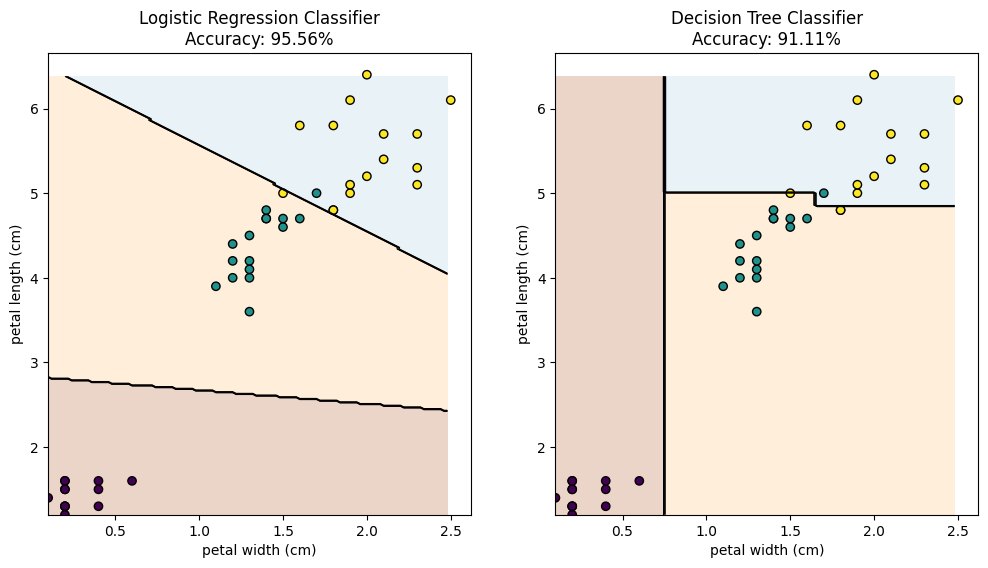

In [39]:
from sklearn.metrics import accuracy_score
    
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

two_features = ['petal width (cm)', 'petal length (cm)']


clf_lr = LogisticRegression()
clf_lr.fit(df_train[two_features], df_train['target'])
accuracy = accuracy_score(
    df_test['target'], 
    clf_lr.predict(df_test[two_features])
)
plot_decision_boundary(
    clf_lr, df_test[two_features], df_test['target'], ax=axs[0], 
    title=f'Logistic Regression Classifier\nAccuracy: {accuracy:.2%}'
)

clf_dt = DecisionTreeClassifier(max_depth=3)
clf_dt.fit(df_train[two_features], df_train['target'])
accuracy = accuracy_score(
    df_test['target'], 
    clf_dt.predict(df_test[two_features])
)
plot_decision_boundary(
    clf_dt, df_test[two_features], df_test['target'], ax=axs[1], 
    title=f'Decision Tree Classifier\nAccuracy: {accuracy:.2%}'
)

fig.show()

In [40]:
coef_sign = lambda c: '+' if c >= 0 else '-'

for i, coef_pair in enumerate(clf_lr.coef_):
    print(
        'Class {class_id} Boundary: {intercept} {coef0} {coef1}'.format(
            class_id=i,
            intercept=f'{clf_lr.intercept_[i]:.2}',
            coef0=f'{coef_sign(coef_pair[0])} {abs(coef_pair[0]):.2} * {two_features[0]}',
            coef1=f'{coef_sign(coef_pair[1])} {abs(coef_pair[1]):.2} * {two_features[1]}',
        )
    )

Class 0 Boundary: 1e+01 - 1.1 * petal width (cm) - 2.5 * petal length (cm)
Class 1 Boundary: 2.7 - 0.66 * petal width (cm) + 0.088 * petal length (cm)
Class 2 Boundary: -1.3e+01 + 1.7 * petal width (cm) + 2.4 * petal length (cm)
